# Cargar librerias

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


## Cargar Archivo .csv

In [27]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Originales/inmuebles_dommies.csv')
df.dropna(inplace=True)
# Muestra las primeras filas del archivo
df.shape

(1166, 39)

## Filtrado sobre precio.

/tmp/ipykernel_1634938/301453713.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Precio', 'Metros Construidos'])


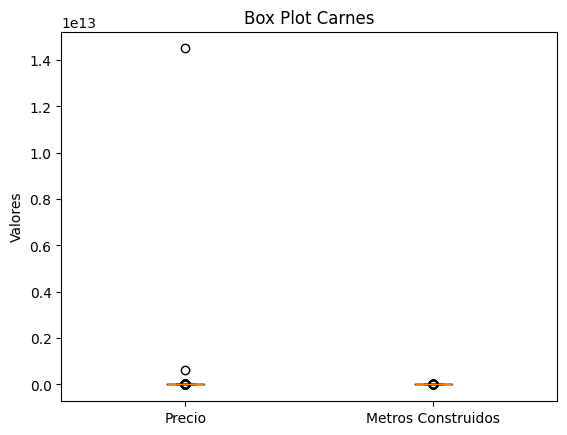

In [28]:
data = [df['precio'], df['metros_construidos']]

# Crear el gráfico de boxplot
plt.boxplot(data, labels=['Precio', 'Metros Construidos'])

# Título y etiquetas
plt.title("Box Plot Carnes")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()

In [29]:
filtro=(df['precio'] > 60000000) & (df['precio']<30000000000)
df=df[filtro].copy()
df.shape

(1159, 39)

## Minimo y maximos de Metros Cuadrados.

In [30]:
minimo = min(df['metros_construidos'])
maximo = max(df['metros_construidos'])
print(f"Minimo de Mtr²: {minimo}, y maximo de Mtr²: {maximo}")


Minimo de Mtr²: 2.0, y maximo de Mtr²: 47679.0


## Filtrado de Metros cuadrados

In [31]:
filtro = (df['metros_construidos'] >= 40) & (df['metros_construidos'] <= maximo) & df['metros_construidos'].notnull()
df=df[filtro].copy()
df.reset_index(drop=True, inplace=True)
df.shape

(1157, 39)

## Resumen

In [32]:
# Resumen completo
resumen_completo = df.describe(include='all')
print(resumen_completo)

                            titulo localizacion         precio   baños  \
count                         1157         1157        1157.00 1157.00   
unique                         132          132            NaN     NaN   
top     Casa en venta en Cartagena    Cartagena            NaN     NaN   
freq                           222          222            NaN     NaN   
mean                           NaN          NaN  2091007800.66    3.82   
std                            NaN          NaN  2990956119.15    2.17   
min                            NaN          NaN   165000000.00    2.00   
25%                            NaN          NaN   450000000.00    3.00   
50%                            NaN          NaN   931171500.00    3.00   
75%                            NaN          NaN  2350000000.00    5.00   
max                            NaN          NaN 22000000000.00   53.00   

        habitabiones  metros_construidos  estrato  parqueadero  gas_natural  \
count        1157.00            

## Limpiar datos de localización donde tenga conincidencia que no sean barrios

In [33]:
# Eliminar filas donde 'localizacion' contiene los valores específicos
df = df[~df['localizacion'].str.contains('Provincia de Cartagena|Cartagena', na=False)]
df.shape

(876, 39)

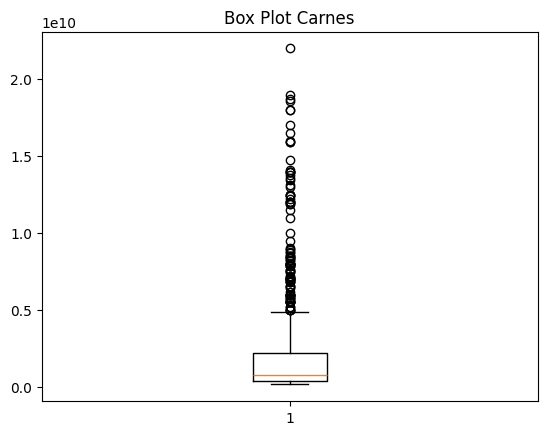

In [34]:

plt.boxplot(df['precio'])
plt.title("Box Plot Carnes")
plt.show()

## Exportar Datos limpios

In [35]:
df.to_csv('../Data/db/Procesados/data_limpia.csv', index=False)